In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [14]:

def get_data(csv):
    df = pd.read_csv(csv, index_col=0)
    X, y = df.iloc[:, [0, 1]].to_numpy(), df.iloc[:, -1].to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)
    return X, y, X_train, X_test, y_train, y_test

def create_evaluation_grid(svc, xlim, ylim):
    xx, yy = np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T       # ravel flattens an array
    Z = svc.decision_function(xy).reshape(XX.shape)
    return XX, YY, Z

def plot_data_set(ax, X, y):
    ax.scatter(X[:,0], X[:,1], c=y, alpha=0.4)
    ax.set_facecolor('xkcd:sky blue')

def plot_decision_fn(svc, ax):
    XX, YY, Z = create_evaluation_grid(svc, ax.get_xlim(), ax.get_ylim())
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=10,
            linewidth=1, facecolors='none', edgecolors='0.2', alpha=0.3)

def plot_data_and_SVC(svc, X_test, y_test, ax):
    plot_data_set(ax, X_test, svc.predict(X_test))
    plot_decision_fn(svc, ax)

def annotate_svc_results(svc, X, y, ax):
    annotation  = f"score = {np.round(svc.score(X_test, y_test), 5)}"
    annotation += f"\n{len(svc.support_vectors_[:, 0])} support vectors"
    ann_y = ax.get_ylim()[0]+0.1
    ax.annotate(annotation, (-0.2, ann_y), bbox=dict(boxstyle="round ,pad=0.3", fc="cyan", ec="b", lw=2, alpha=0.4))
    

def svc_analysis(X_train, X_test, y_train, y_test, C, ax, kernel=None, max_iter=100000):
    svc = SVC(C=C, kernel=kernel, random_state=50, max_iter=max_iter).fit(X_train, y_train) 
    plot_data_and_SVC(svc, X_test, y_test, ax)
    annotate_svc_results(svc, X_test, y_test, ax)

def svc_kernel_analysis(X_train, X_test, y_train, y_test, Cs = [0.001, 100, 10000000], kernel='rbf'):
    fig, axes = plt.subplots(figsize=(20, len(Cs)*1.5), nrows=len(Cs)//3, ncols=3)
    fig.suptitle(f"kernel = {kernel}")
    for C, ax in zip(Cs, axes.flatten()):
        ax.set_title(f'Regularization Param (C) = {C}')
        svc_analysis(X_train, X_test, y_train, y_test, C, ax, kernel)

Cs = [0.001, 100, 10000000]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

C:\Python39\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


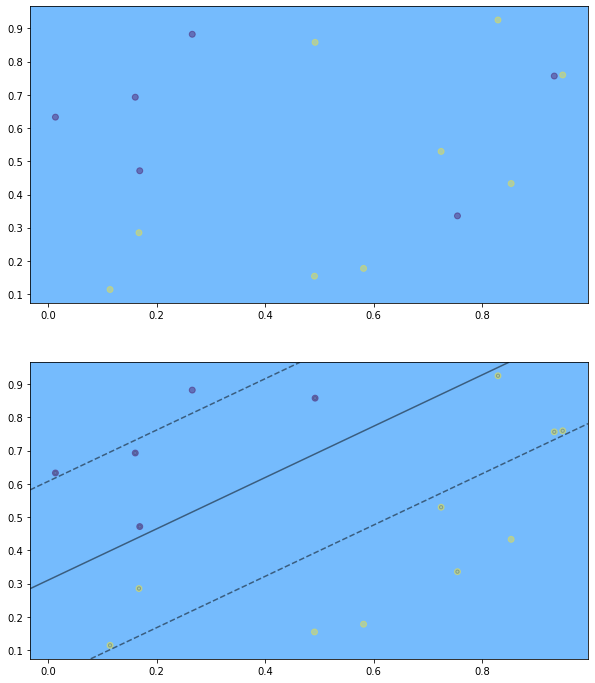

In [15]:
# List1  
lst = np.random.rand(15,3)      
df = pd.DataFrame(lst, dtype = float) 
df[2] = np.round(df[2])
df[2] = df[2].astype('int32')
X, y = df.iloc[:, [0, 1]].to_numpy(), df.iloc[:, -1].to_numpy()


svc = SVC(C=10000, kernel='linear', random_state=50, max_iter=10000).fit(X, y) 

fig, axes = plt.subplots(figsize=(10, 12), nrows=2, ncols=1)

plot_data_set(axes[0], X, y)
plot_data_set(axes[1], X, svc.predict(X))
plot_decision_fn(svc, axes[1])


In [16]:
fig.savefig('example_fig')